  iso_code continent     location      date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  1/5/2020          0.0        0.0   
1      AFG      Asia  Afghanistan  1/6/2020          0.0        0.0   
2      AFG      Asia  Afghanistan  1/7/2020          0.0        0.0   
3      AFG      Asia  Afghanistan  1/8/2020          0.0        0.0   
4      AFG      Asia  Afghanistan  1/9/2020          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746

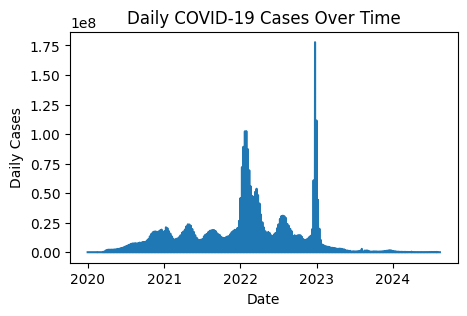

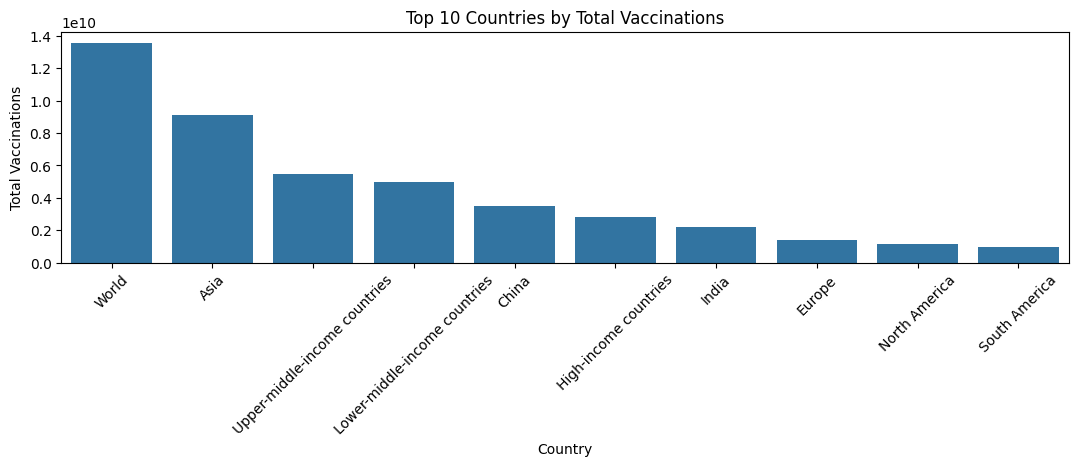

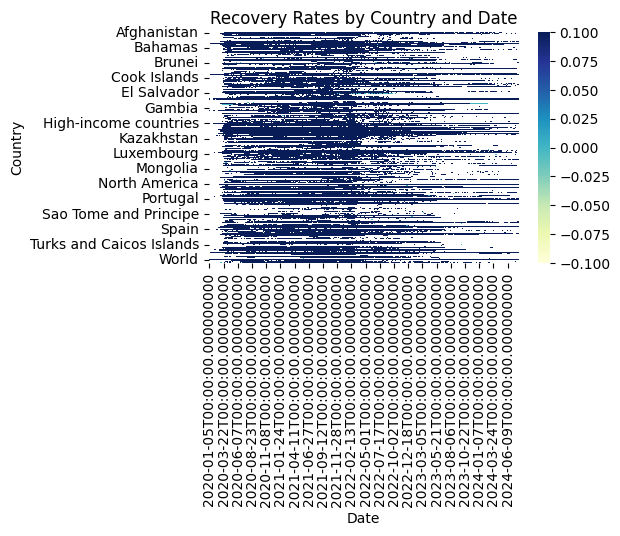

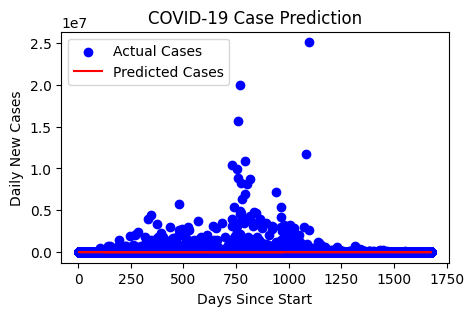

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
df = pd.read_csv('../data/owid-covid-data.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Filter relevant columns
df = df[['date', 'location', 'total_vaccinations', 'people_vaccinated', 'new_cases', 'new_deaths']]

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Analyze infection rates over time
infection_rates = df.groupby('date')['new_cases'].sum().reset_index()

# Visualize infection rates
plt.figure(figsize=(5, 3))
sns.lineplot(x='date', y='new_cases', data=infection_rates)
plt.title('Daily COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.savefig('../visualizations/infection_rates.png')  # Save the plot
plt.show()

# Analyze vaccination trends
vaccination_trends = df.groupby('location')['total_vaccinations'].max().reset_index()

# Visualize top 10 countries by vaccinations
plt.figure(figsize=(12, 4))
sns.barplot(x='location', y='total_vaccinations', data=vaccination_trends.sort_values(by='total_vaccinations', ascending=False).head(10))
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.savefig('../visualizations/vaccination_trends.png')  # Save the plot
plt.show()

# Analyze recovery rates (if recovery data is available)
df['recovery_rate'] = df['new_cases'] / df['new_deaths']

# Visualize recovery rates (heatmap)
recovery_data = df.pivot_table(index='location', columns='date', values='recovery_rate')
plt.figure(figsize=(5, 3 ))
sns.heatmap(recovery_data, cmap='YlGnBu')
plt.title('Recovery Rates by Country and Date')
plt.xlabel('Date')
plt.ylabel('Country')
plt.savefig('../visualizations/recovery_heatmap.png')  # Save the plot
plt.show()

# Prepare data for prediction
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Drop rows with missing values in 'days_since_start' or 'new_cases'
df_cleaned = df.dropna(subset=['days_since_start', 'new_cases'])

# Define features and target
X = df_cleaned[['days_since_start']]  # Feature: days since the start of the dataset
y = df_cleaned['new_cases']           # Target: daily new cases

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(5, 3))
plt.scatter(X_test, y_test, color='blue', label='Actual Cases')
plt.plot(X_test, y_pred, color='red', label='Predicted Cases')
plt.title('COVID-19 Case Prediction')
plt.xlabel('Days Since Start')
plt.ylabel('Daily New Cases')
plt.legend()
plt.savefig('../visualizations/case_prediction.png')  # Save the plot
plt.show()